### This notebook aims to explore about the audio features

Some of the audio features that we will explore:
- Root-Mean-Square Energy (RMS Energy)
- Zero-Crossing Rate (ZCR)
- Spectral Centroid
- Spectral Bandwidth
- Spectral Flatness

### Import Libraries

In [1]:
%matplotlib inline
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import pandas as pd

### Load Sample Audios

In [2]:
yes_audios = os.listdir("../data/yes/")
no_audios = os.listdir("../data/no/")

# we will grab the first two audios in each class
sample_yes_audio1_path = "../data/yes/" + yes_audios[0]
sample_yes_audio2_path = "../data/yes/" + yes_audios[1]
sample_yes_audio3_path = "../data/yes/" + yes_audios[2]
sample_no_audio1_path = "../data/no/" + no_audios[0]
sample_no_audio2_path = "../data/no/" + no_audios[1]
sample_no_audio3_path = "../data/no/" + no_audios[2]

# load the audios
sample_yes_audio1, sr = librosa.load(sample_yes_audio1_path)
sample_yes_audio2, _ = librosa.load(sample_yes_audio2_path)
sample_yes_audio3, _ = librosa.load(sample_yes_audio3_path)
sample_no_audio1, _ = librosa.load(sample_no_audio1_path)
sample_no_audio2, _ = librosa.load(sample_no_audio2_path)
sample_no_audio3, _ = librosa.load(sample_no_audio3_path)

In [3]:
ipd.Audio(sample_yes_audio1_path)

In [4]:
ipd.Audio(sample_yes_audio2_path)

In [5]:
ipd.Audio(sample_yes_audio3_path)

In [6]:
ipd.Audio(sample_no_audio1_path)

In [7]:
ipd.Audio(sample_no_audio2_path)

In [8]:
ipd.Audio(sample_no_audio3_path)

### Define Some Constants

In [9]:
FRAME_SIZE = 1024
HOP_LENGTH = 512

### Root-Mean-Square Energy (RMS Energy)

Mean:
'yes audio 1':  0.0950140729546547
'yes audio 2':  0.05911143124103546
'yes audio 3':  0.020252205431461334
'no audio 1':   0.091709204018116
'no audio 2':   0.21155792474746704

Standard Deviation:
'yes audio 1':  0.008537353947758675
'yes audio 2':  0.006083405576646328
'yes audio 3':  0.002024332992732525
'no audio 1':   0.022999130189418793
'no audio 2':   0.06467664986848831
'no audio 3':   0.037879280745983124

Variance:
'yes audio 1':  7.288641791092232e-05
'yes audio 2':  3.700782326632179e-05
'yes audio 3':  4.09792437494616e-06
'no audio 1':   0.0005289599648676813
'no audio 2':   0.004183069337159395
'no audio 3':   0.0014348399126902223



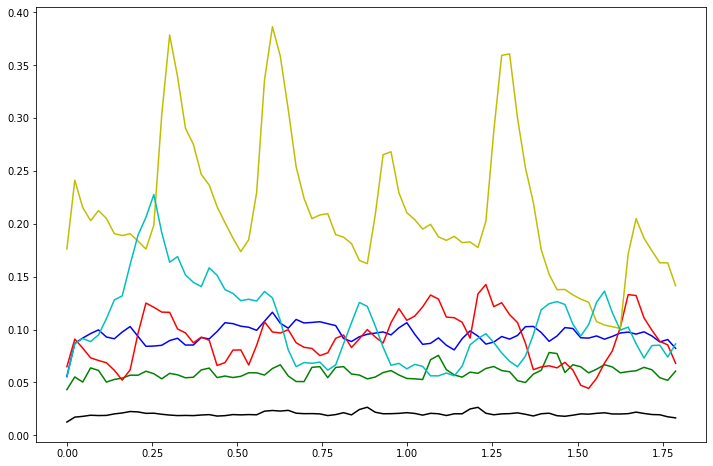

In [15]:
# RMS Energy as the y-axis
rms_yes_1 = librosa.feature.rms(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_2 = librosa.feature.rms(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_yes_3 = librosa.feature.rms(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_1 = librosa.feature.rms(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_2 = librosa.feature.rms(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
rms_no_3 = librosa.feature.rms(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(rms_yes_1)}
'yes audio 2':  {np.mean(rms_yes_2)}
'yes audio 3':  {np.mean(rms_yes_3)}
'no audio 1':   {np.mean(rms_no_1)}
'no audio 2':   {np.mean(rms_no_2)}

Standard Deviation:
'yes audio 1':  {np.std(rms_yes_1)}
'yes audio 2':  {np.std(rms_yes_2)}
'yes audio 3':  {np.std(rms_yes_3)}
'no audio 1':   {np.std(rms_no_1)}
'no audio 2':   {np.std(rms_no_2)}
'no audio 3':   {np.std(rms_no_3)}

Variance:
'yes audio 1':  {np.var(rms_yes_1)}
'yes audio 2':  {np.var(rms_yes_2)}
'yes audio 3':  {np.var(rms_yes_3)}
'no audio 1':   {np.var(rms_no_1)}
'no audio 2':   {np.var(rms_no_2)}
'no audio 3':   {np.var(rms_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, rms_yes_1, color='b')
plt.plot(t, rms_yes_2, color='g')
plt.plot(t, rms_yes_3, color='k')
plt.plot(t, rms_no_1, color='r')
plt.plot(t, rms_no_2, color='y')
plt.plot(t, rms_no_3, color='c')
plt.show()

### Zero-Crossing Rate (ZCR)

Mean:
'yes audio 1':  0.20711889022435898
'yes audio 2':  0.17715845352564102
'yes audio 3':  0.15998096955128205
'no audio 1':   0.046236478365384616
'no audio 2':   0.05376101762820513
'no audio 3':   0.053873697916666664

Standard Deviation:
'yes audio 1':  0.016368068582830114
'yes audio 2':  0.017167424851704048
'yes audio 3':  0.011594712388739036
'no audio 1':   0.014481239745840308
'no audio 2':   0.013322114230959067
'no audio 3':   0.01918539988078901

Variance:
'yes audio 1':  0.00026791366913223025
'yes audio 2':  0.0002947204760389058
'yes audio 3':  0.00013443735537757847
'no audio 1':   0.00020970630457650506
'no audio 2':   0.00017747872758272208
'no audio 3':   0.000368079568585779



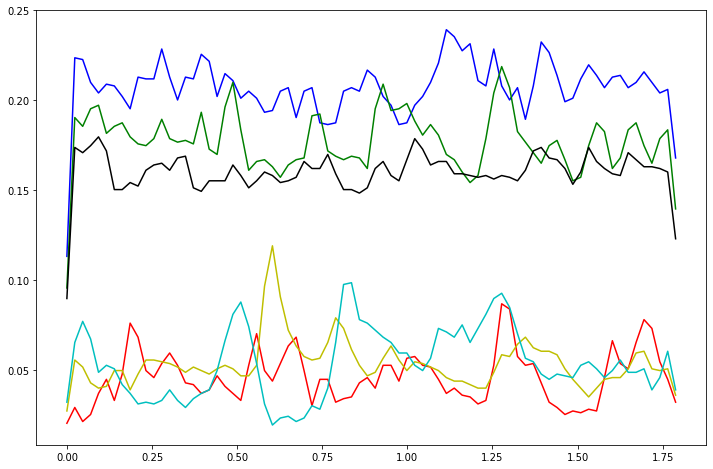

In [18]:
# Zero-Crossing Rate as the y-axis
zcr_yes_1 = librosa.feature.zero_crossing_rate(y=sample_yes_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_2 = librosa.feature.zero_crossing_rate(y=sample_yes_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_yes_3 = librosa.feature.zero_crossing_rate(y=sample_yes_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_1 = librosa.feature.zero_crossing_rate(y=sample_no_audio1, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_2 = librosa.feature.zero_crossing_rate(y=sample_no_audio2, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
zcr_no_3 = librosa.feature.zero_crossing_rate(y=sample_no_audio3, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(zcr_yes_1)}
'yes audio 2':  {np.mean(zcr_yes_2)}
'yes audio 3':  {np.mean(zcr_yes_3)}
'no audio 1':   {np.mean(zcr_no_1)}
'no audio 2':   {np.mean(zcr_no_2)}
'no audio 3':   {np.mean(zcr_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(zcr_yes_1)}
'yes audio 2':  {np.std(zcr_yes_2)}
'yes audio 3':  {np.std(zcr_yes_3)}
'no audio 1':   {np.std(zcr_no_1)}
'no audio 2':   {np.std(zcr_no_2)}
'no audio 3':   {np.std(zcr_no_3)}

Variance:
'yes audio 1':  {np.var(zcr_yes_1)}
'yes audio 2':  {np.var(zcr_yes_2)}
'yes audio 3':  {np.var(zcr_yes_3)}
'no audio 1':   {np.var(zcr_no_1)}
'no audio 2':   {np.var(zcr_no_2)}
'no audio 3':   {np.var(zcr_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, zcr_yes_1, color='b')
plt.plot(t, zcr_yes_2, color='g')
plt.plot(t, zcr_yes_3, color='k')
plt.plot(t, zcr_no_1, color='r')
plt.plot(t, zcr_no_2, color='y')
plt.plot(t, zcr_no_3, color='c')
plt.show()

### Spectral Centroid

Mean:
'yes audio 1':  3092.685976656596
'yes audio 2':  2805.522426010611
'yes audio 3':  2497.687897388536
'no audio 1':   1018.4018752385841
'no audio 2':   788.6933569829072
'no audio 3':   1130.2787880197077

Standard Deviation:
'yes audio 1':  80.24460386470054
'yes audio 2':  170.78993421687585
'yes audio 3':  102.32221219537472
'no audio 1':   215.500291279424
'no audio 2':   112.3647719468988
'no audio 3':   230.03837819533035

Variance:
'yes audio 1':  6439.196449402713
'yes audio 2':  29169.201629804782
'yes audio 3':  10469.835108555291
'no audio 1':   46440.37554151659
'no audio 2':   12625.841974678577
'no audio 3':   52917.655442737836



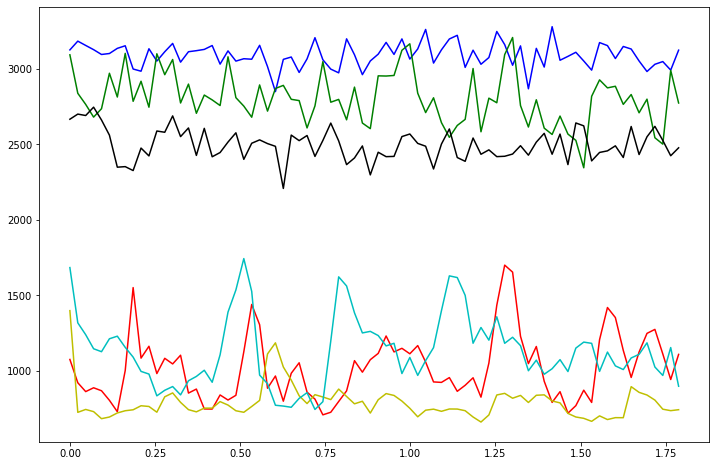

In [20]:
# Spectral Centroid as the y-axis
spectral_centroid_yes_1 = librosa.feature.spectral_centroid(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_2 = librosa.feature.spectral_centroid(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_yes_3 = librosa.feature.spectral_centroid(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_1 = librosa.feature.spectral_centroid(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_2 = librosa.feature.spectral_centroid(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_centroid_no_3 = librosa.feature.spectral_centroid(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_centroid_yes_1)}
'yes audio 2':  {np.mean(spectral_centroid_yes_2)}
'yes audio 3':  {np.mean(spectral_centroid_yes_3)}
'no audio 1':   {np.mean(spectral_centroid_no_1)}
'no audio 2':   {np.mean(spectral_centroid_no_2)}
'no audio 3':   {np.mean(spectral_centroid_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_centroid_yes_1)}
'yes audio 2':  {np.std(spectral_centroid_yes_2)}
'yes audio 3':  {np.std(spectral_centroid_yes_3)}
'no audio 1':   {np.std(spectral_centroid_no_1)}
'no audio 2':   {np.std(spectral_centroid_no_2)}
'no audio 3':   {np.std(spectral_centroid_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_centroid_yes_1)}
'yes audio 2':  {np.var(spectral_centroid_yes_2)}
'yes audio 3':  {np.var(spectral_centroid_yes_3)}
'no audio 1':   {np.var(spectral_centroid_no_1)}
'no audio 2':   {np.var(spectral_centroid_no_2)}
'no audio 3':   {np.var(spectral_centroid_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_centroid_yes_1, color='b')
plt.plot(t, spectral_centroid_yes_2, color='g')
plt.plot(t, spectral_centroid_yes_3, color='k')
plt.plot(t, spectral_centroid_no_1, color='r')
plt.plot(t, spectral_centroid_no_2, color='y')
plt.plot(t, spectral_centroid_no_3, color='c')
plt.show()

### Spectral Bandwidth

Mean:
'yes audio 1':  2328.2169640833263
'yes audio 2':  2421.566143395128
'yes audio 3':  2194.861566278809
'no audio 1':   1385.3944051908136
'no audio 2':   819.9008966401443
'no audio 3':   1486.5192550967977

Standard Deviation:
'yes audio 1':  72.08078217640146
'yes audio 2':  139.54841969593122
'yes audio 3':  77.36470429195553
'no audio 1':   258.02243332853783
'no audio 2':   137.15665604548317
'no audio 3':   231.5218916902775

Variance:
'yes audio 1':  5195.639159161834
'yes audio 2':  19473.761439631762
'yes audio 3':  5985.297470181722
'no audio 1':   66575.57610077976
'no audio 2':   18811.948297578972
'no audio 3':   53602.38633184458



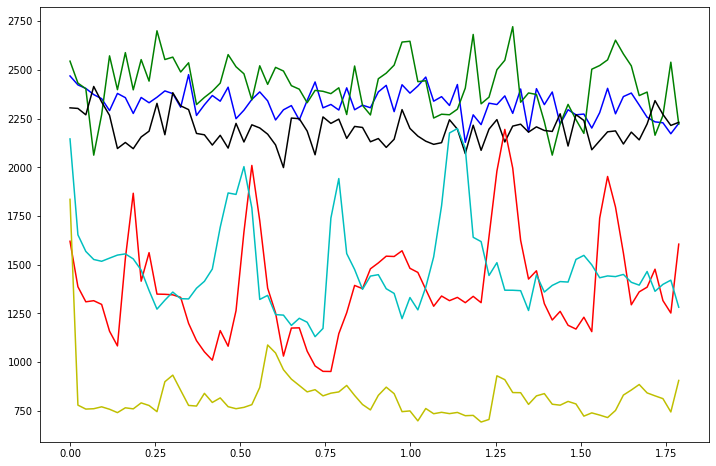

In [21]:
# Spectral Bandwidth as the y-axis
spectral_bandwidth_yes_1 = librosa.feature.spectral_bandwidth(y=sample_yes_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_2 = librosa.feature.spectral_bandwidth(y=sample_yes_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_yes_3 = librosa.feature.spectral_bandwidth(y=sample_yes_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_1 = librosa.feature.spectral_bandwidth(y=sample_no_audio1, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_2 = librosa.feature.spectral_bandwidth(y=sample_no_audio2, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_bandwidth_no_3 = librosa.feature.spectral_bandwidth(y=sample_no_audio3, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 1':  {np.mean(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.mean(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.mean(spectral_bandwidth_yes_3)}
'no audio 1':   {np.mean(spectral_bandwidth_no_1)}
'no audio 2':   {np.mean(spectral_bandwidth_no_2)}
'no audio 3':   {np.mean(spectral_bandwidth_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.std(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.std(spectral_bandwidth_yes_3)}
'no audio 1':   {np.std(spectral_bandwidth_no_1)}
'no audio 2':   {np.std(spectral_bandwidth_no_2)}
'no audio 3':   {np.std(spectral_bandwidth_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_bandwidth_yes_1)}
'yes audio 2':  {np.var(spectral_bandwidth_yes_2)}
'yes audio 3':  {np.var(spectral_bandwidth_yes_3)}
'no audio 1':   {np.var(spectral_bandwidth_no_1)}
'no audio 2':   {np.var(spectral_bandwidth_no_2)}
'no audio 3':   {np.var(spectral_bandwidth_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_bandwidth_yes_1, color='b')
plt.plot(t, spectral_bandwidth_yes_2, color='g')
plt.plot(t, spectral_bandwidth_yes_3, color='k')
plt.plot(t, spectral_bandwidth_no_1, color='r')
plt.plot(t, spectral_bandwidth_no_2, color='y')
plt.plot(t, spectral_bandwidth_no_3, color='c')
plt.show()

### Spectral Flatness

Mean:
'yes audio 2':  0.06479392200708389
'yes audio 1':  0.07436248660087585
'yes audio 3':  0.0379001721739769
'no audio 1':   0.0009325869032181799
'no audio 2':   0.00018854883091989905
'no audio 3':   0.001437041675671935

Standard Deviation:
'yes audio 1':  0.01190495491027832
'yes audio 2':  0.01775505393743515
'yes audio 3':  0.007411385886371136
'no audio 1':   0.0009184856317006052
'no audio 2':   0.0009841705905273557
'no audio 3':   0.0020434975158423185

Variance:
'yes audio 1':  0.00014172795636113733
'yes audio 2':  0.00031524195219390094
'yes audio 3':  5.4928641475271434e-05
'no audio 1':   8.436158509539382e-07
'no audio 2':   9.685918485047296e-07
'no audio 3':   4.175881713308627e-06



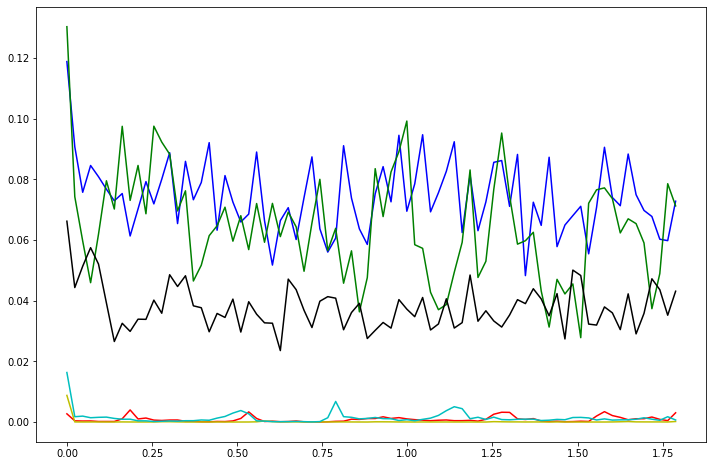

In [23]:
# Spectral Flatness as the y-axis
spectral_flatness_yes_1 = librosa.feature.spectral_flatness(y=sample_yes_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_2 = librosa.feature.spectral_flatness(y=sample_yes_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_yes_3 = librosa.feature.spectral_flatness(y=sample_yes_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_1 = librosa.feature.spectral_flatness(y=sample_no_audio1, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_2 = librosa.feature.spectral_flatness(y=sample_no_audio2, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
spectral_flatness_no_3 = librosa.feature.spectral_flatness(y=sample_no_audio3, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

print(f"""Mean:
'yes audio 2':  {np.mean(spectral_flatness_yes_2)}
'yes audio 1':  {np.mean(spectral_flatness_yes_1)}
'yes audio 3':  {np.mean(spectral_flatness_yes_3)}
'no audio 1':   {np.mean(spectral_flatness_no_1)}
'no audio 2':   {np.mean(spectral_flatness_no_2)}
'no audio 3':   {np.mean(spectral_flatness_no_3)}

Standard Deviation:
'yes audio 1':  {np.std(spectral_flatness_yes_1)}
'yes audio 2':  {np.std(spectral_flatness_yes_2)}
'yes audio 3':  {np.std(spectral_flatness_yes_3)}
'no audio 1':   {np.std(spectral_flatness_no_1)}
'no audio 2':   {np.std(spectral_flatness_no_2)}
'no audio 3':   {np.std(spectral_flatness_no_3)}

Variance:
'yes audio 1':  {np.var(spectral_flatness_yes_1)}
'yes audio 2':  {np.var(spectral_flatness_yes_2)}
'yes audio 3':  {np.var(spectral_flatness_yes_3)}
'no audio 1':   {np.var(spectral_flatness_no_1)}
'no audio 2':   {np.var(spectral_flatness_no_2)}
'no audio 3':   {np.var(spectral_flatness_no_3)}
""")

# Time as the x-axis
frames = range(0, rms_yes_1.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(t, spectral_flatness_yes_1, color='b')
plt.plot(t, spectral_flatness_yes_2, color='g')
plt.plot(t, spectral_flatness_yes_3, color='k')
plt.plot(t, spectral_flatness_no_1, color='r')
plt.plot(t, spectral_flatness_no_2, color='y')
plt.plot(t, spectral_flatness_no_3, color='c')
plt.show()